In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pdb

第一个数字等于1代表超对称信号，等于0代表背景噪声。
剩下18个数字，对应18个对撞事例末态特征取值，详见
https://www.nature.com/articles/ncomms5308


In [54]:
path = "SUSY.csv"
susy = pd.read_csv(path)
label = "0.000000000000000000e+00"

In [55]:
#切分出噪声和信号特征
signal = susy[susy[label] == 1].drop(label,axis = 1)
noise = susy[susy[label] == 0].drop(label,axis = 1)

##数据量比较庞大，因此研究数据特征时候我们随机抽样一些数据进行研究
#此处抽取10000个样本进行研究
signal_smp = signal.sample(n = 10000,axis = 0)
noise_smp = noise.sample(n = 10000,axis = 0)

(1)从数据样本中挑选出信号与噪声，对 18 个特征作图对比

In [56]:
#画出x的直方图，shape = 3*6
def feature(x): 
    fig, axes = plt.subplots(3, 6, figsize=(15, 9))
    for i in range(18):
        cidx = i % 18
        col = x.columns[cidx]
        ax = axes[i // 6, i % 6]
        ax.hist(x[col],bins = 100)
        ax.set_title(f'feature {cidx + 1}')
        pass
    plt.tight_layout()
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.style.use("ggplot")
    plt.show()
    pass

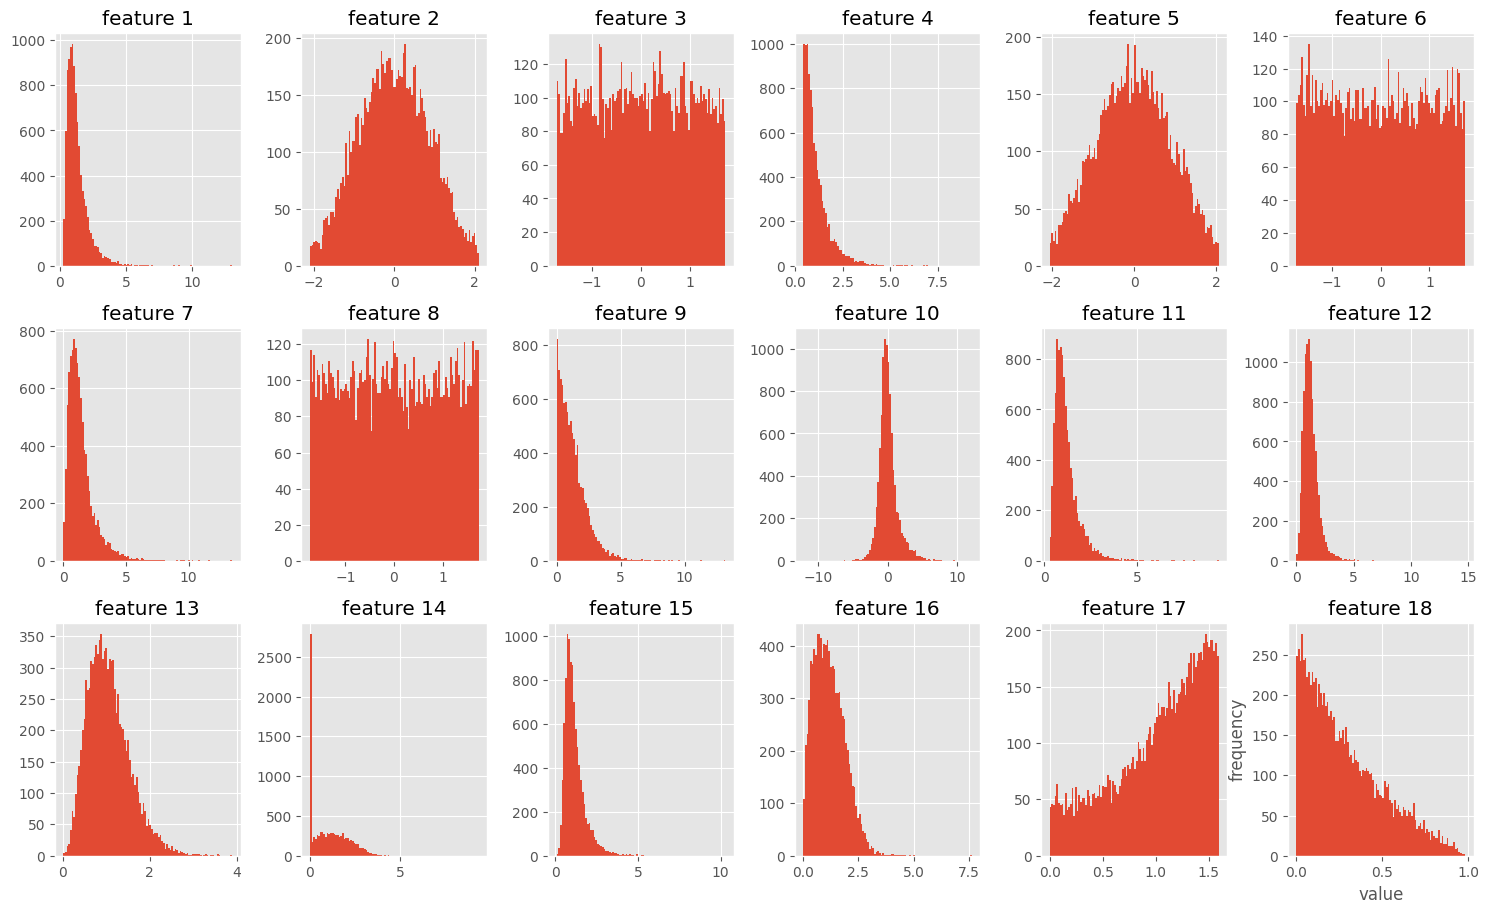

In [57]:
#观察信号数据的每一个特征
feature(signal_smp)

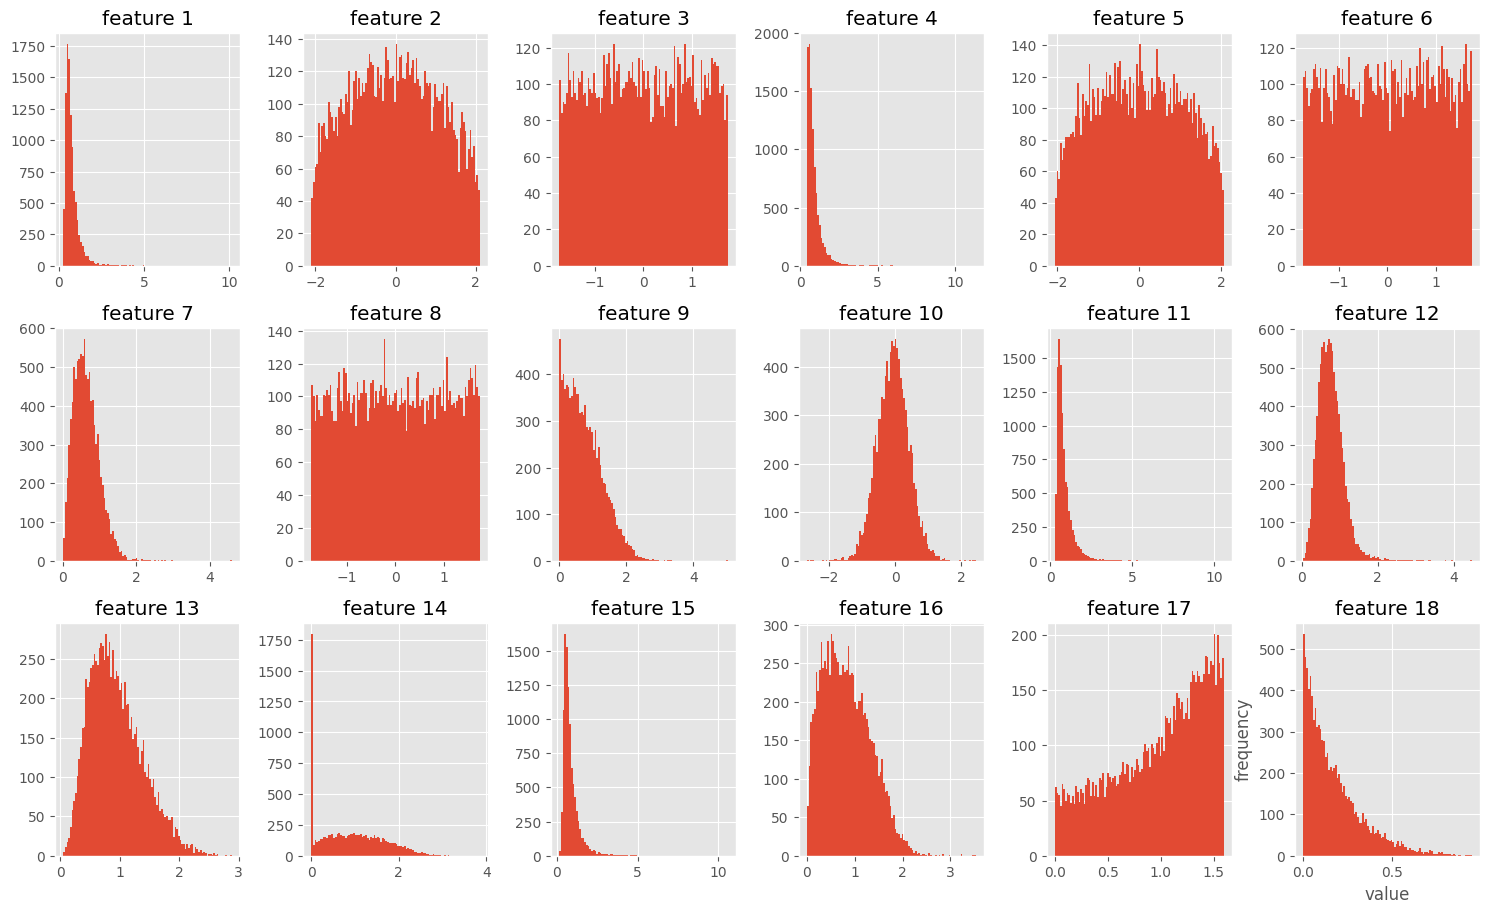

In [58]:
#观察噪声数据的每一个特征
feature(noise_smp)

(2)划分训练与测试样本，作图对比信号与噪声的各个特征在两个样本中的分布

In [59]:
#切分出偶数行作为训练集
train = susy.loc[::2].drop(label,axis = 1)
#切分出奇数行作为测试集
test = susy.loc[1::2].drop(label,axis = 1)

#我们依然采样10000份进行研究
train_smp = train.sample(n = 10000,axis = 0)
test_smp = test.sample(n = 10000,axis = 0)

信号和噪声的各个特征在训练集中的分布

In [60]:
#画出x和y的直方图，对比x和y的关系。shape = 3*6
def feature_distribution(x,y):
    fig, axes = plt.subplots(3, 6, figsize=(15, 9))
    for i in range(18):
        cidx = i % 18
        col = x.columns[cidx]
        ax = axes[i // 6, i % 6]
        ax.hist(x[col],bins = 100,alpha = 0.5)
        ax.hist(y[col],bins = 100,alpha = 0.5)
        ax.set_title(f'feature {cidx + 1}')
        pass
    plt.tight_layout()
    plt.show()
    pass

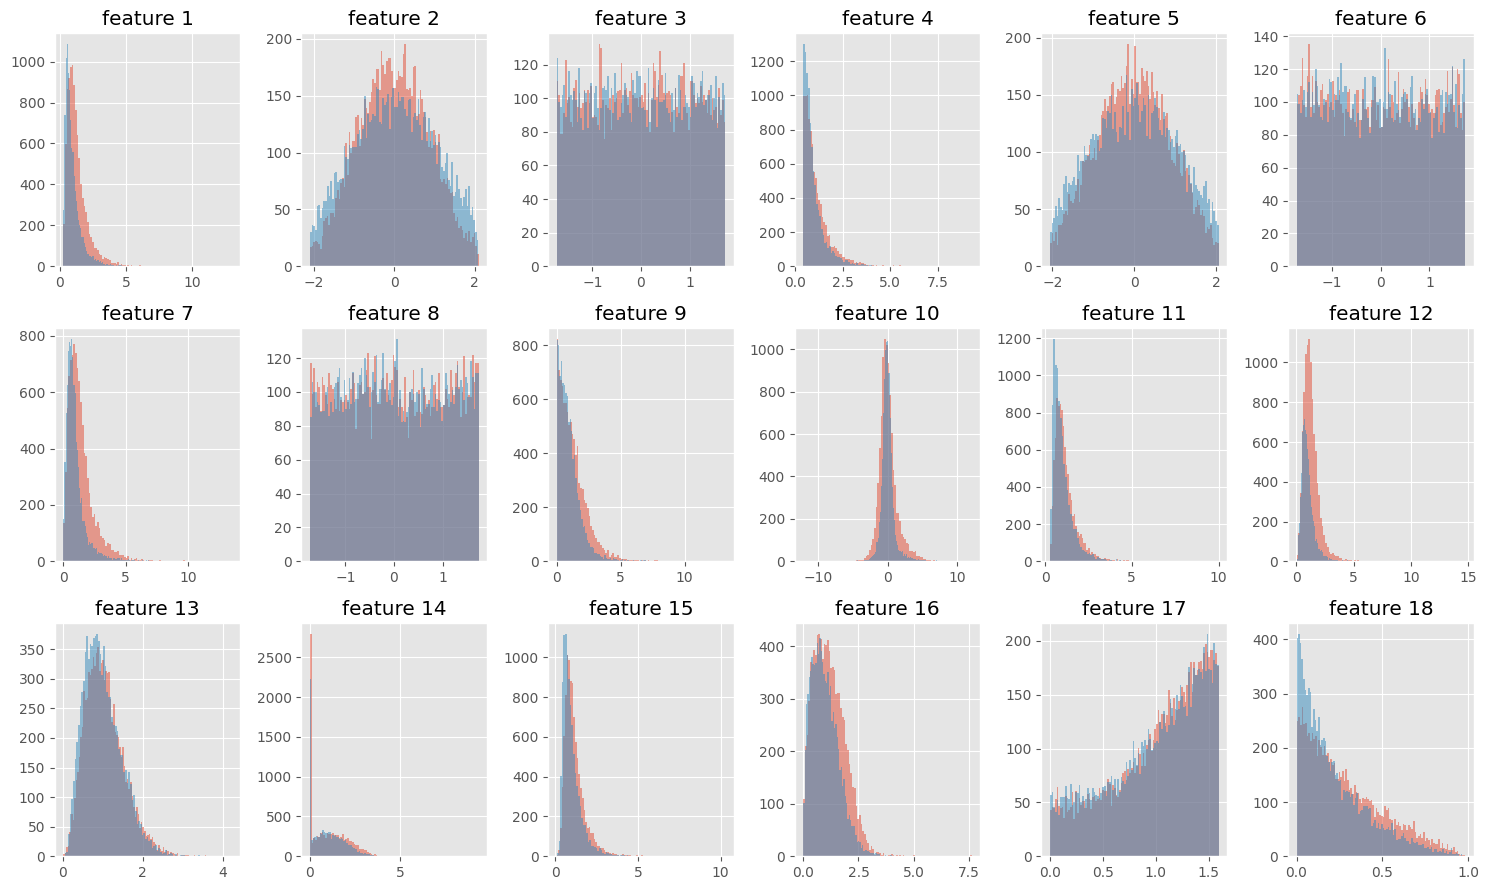

In [61]:
#信号特征在训练集分布
feature_distribution(signal_smp,train_smp)

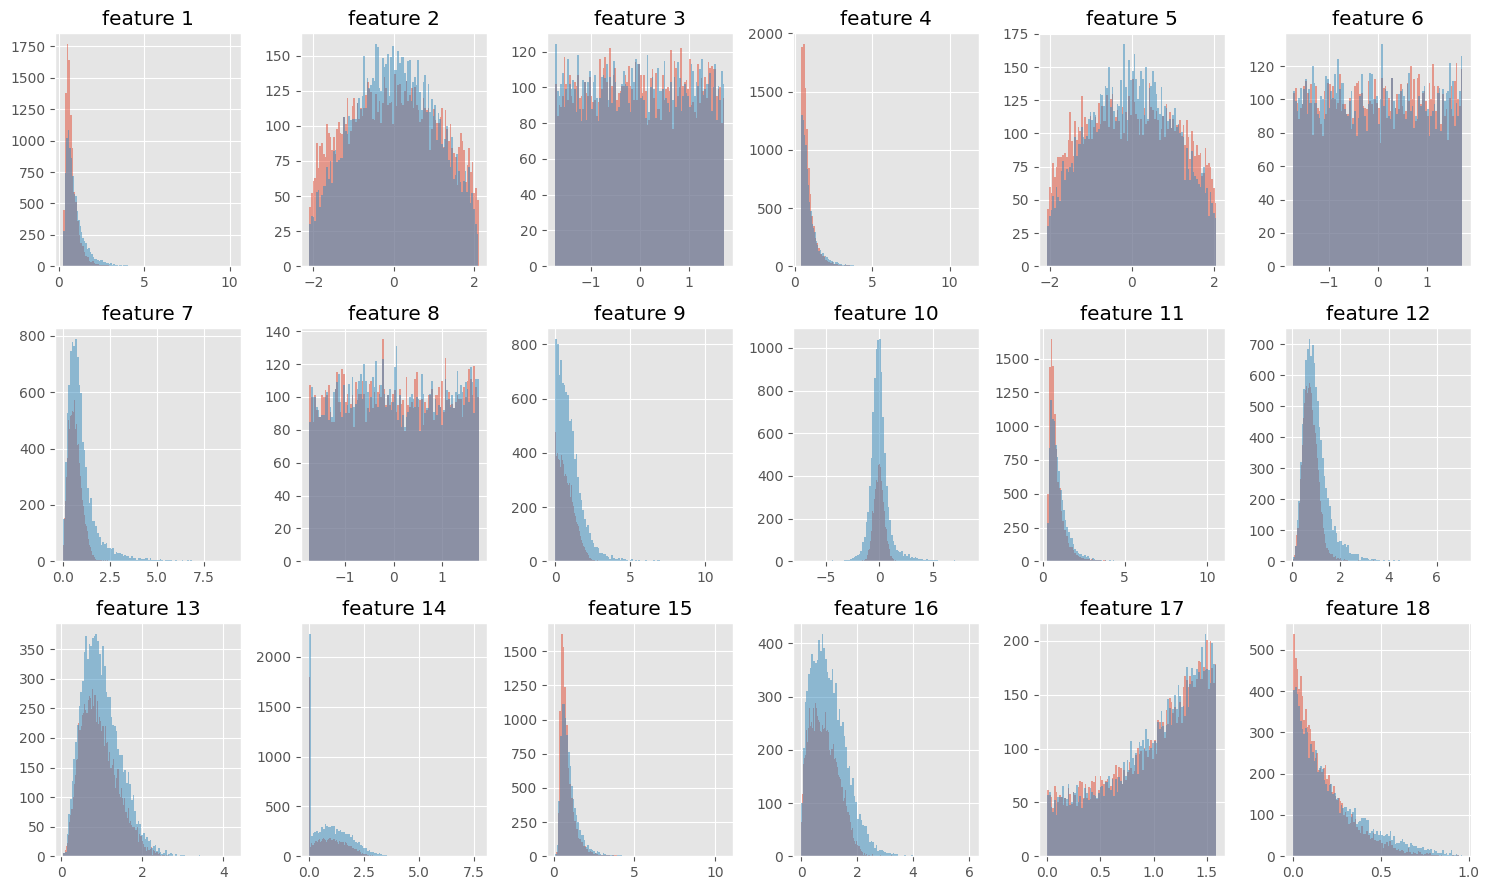

In [62]:
#噪声特征在训练集分布
feature_distribution(noise_smp,train_smp)

信号和噪声的各个特征在测试集中的分布

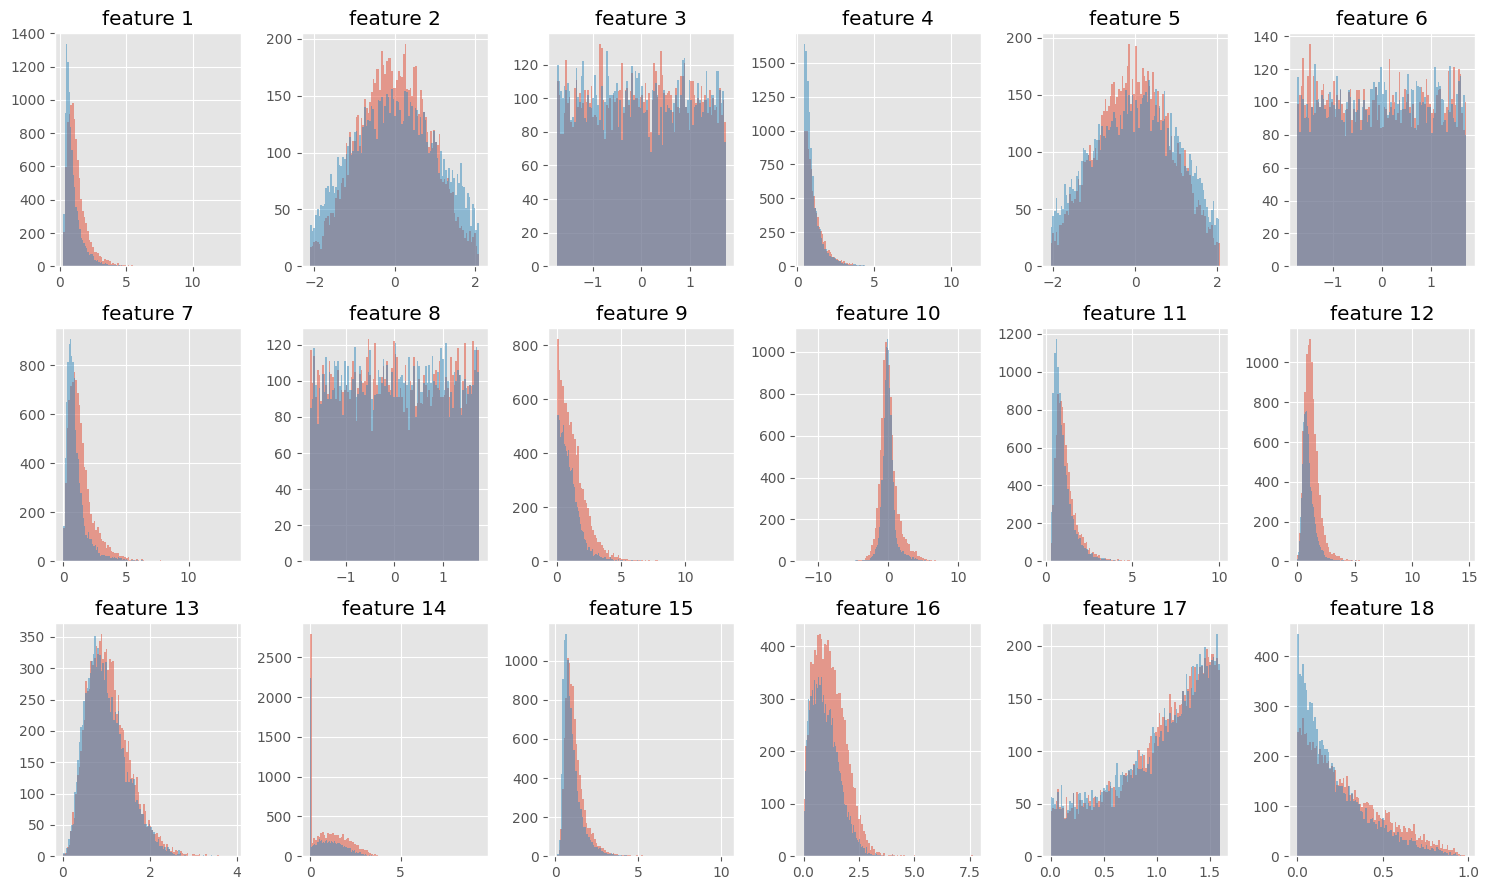

In [63]:
#信号特征在测试集分布
feature_distribution(signal_smp,test_smp)

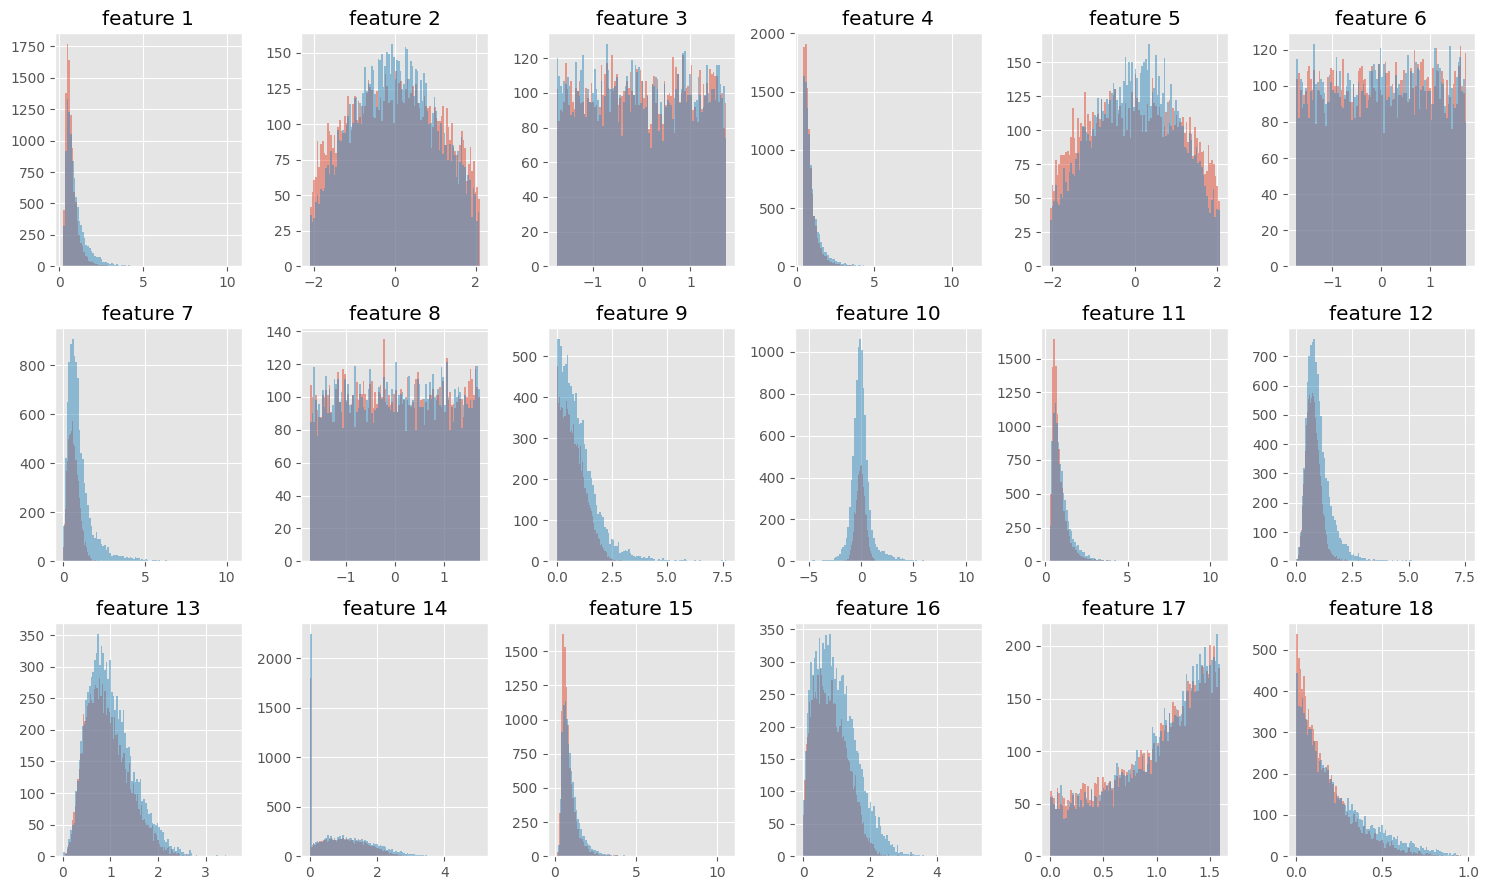

In [64]:
#噪声特征在测试集分布
feature_distribution(noise_smp,test_smp)

(3)研究18个特征的关联度，画出关联图(分信号与噪声讨论)

In [67]:
def association_map(x):
     # 计算相关性矩阵
    corr_matrix = x.corr()
    # 绘制关联图
    plt.figure(figsize=(12, 9))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('association_map')
    plt.tight_layout()
    plt.show()
    pass

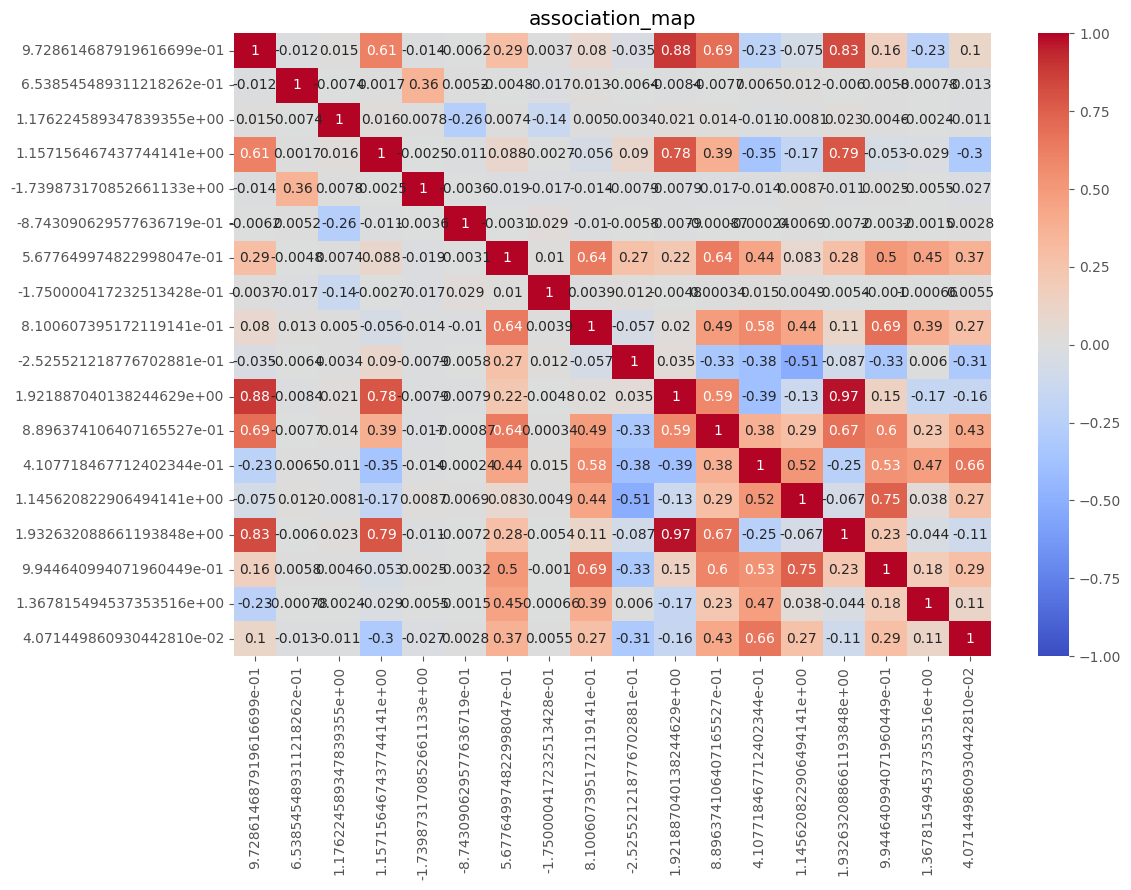

In [68]:
#信号数据
association_map(signal_smp)

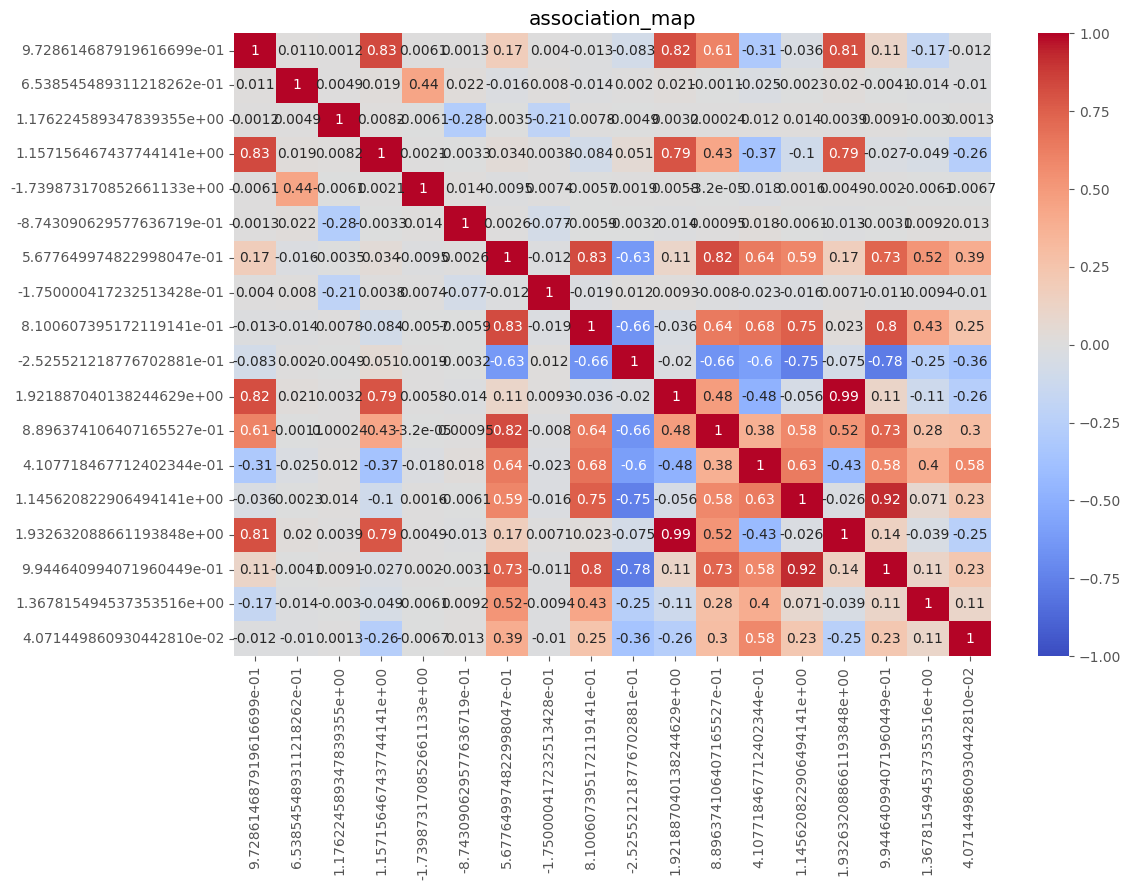

In [69]:
#噪声数据
association_map(noise_smp)